In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

In [2]:
a=pd.read_csv("/Users/user/Desktop/Database/Datasets/diabetes.csv")

In [3]:
a.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
a.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**DataFrame.describe()** method generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. This method tells us a lot of things about a dataset. One important thing is that the describe() method deals only with numeric values. It doesn't work with any categorical values. So if there are any categorical values in a column the describe() method will ignore it and display summary for the other columns unless parameter include="all" is passed.

Now, let's understand the statistics that are generated by the describe() method:
* count tells us the number of NoN-empty rows in a feature.
* mean tells us the mean value of that feature.
* std tells us the Standard Deviation Value of that feature.
* min tells us the minimum value of that feature.
* 25%, 50%, and 75% are the percentile/quartile of each features. This quartile information helps us to detect Outliers.
* max tells us the maximum value of that feature.

In [5]:
a.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
a.describe().T # creating the trsnspose of the description of the Dataframe and then showing it

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### The Question creeping out of this summary

#### Can minimum value of below listed columns be zero (0)?

On these columns, a value of zero does not make sense and thus indicates missing value.

Following columns or variables have an invalid zero value:
1. Glucose
2. BloodPressure
3. SkinThickness
4. Insulin
5. BMI

#### It is better to replace zeros with nan since after that counting them would be easier and zeros need to be replaced with suitable values

In [7]:
a_copy = a.copy(deep = True) # creating the copy of the dataset
# replacing the 0 values with Nan
a_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = a_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(a_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


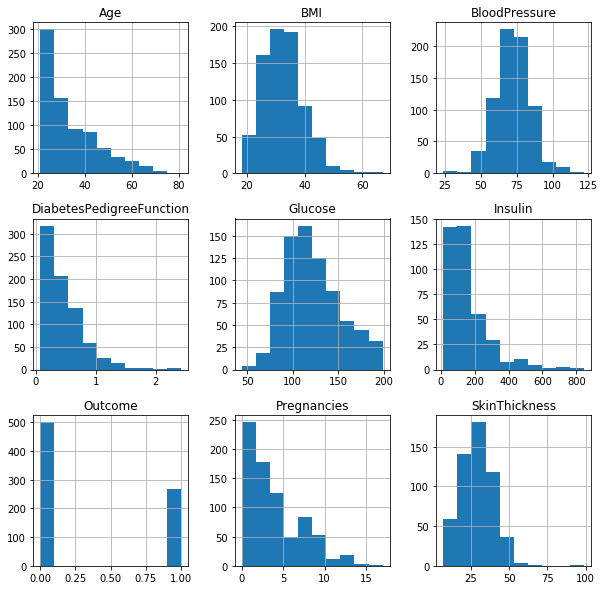

In [8]:
p = a_copy.hist(figsize = (10,10))

### Aiming to impute nan values for the columns in accordance with their distribution

In [9]:
a_copy['Glucose'].fillna(a_copy['Glucose'].mean(), inplace = True)
a_copy.isna().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [10]:
a_copy['BloodPressure'].fillna(a_copy["BloodPressure"].mean(),inplace =True)
a_copy.isna().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [11]:
a_copy['SkinThickness'].fillna(a_copy["SkinThickness"].mean(),inplace =True)
a_copy.isna().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [12]:
a_copy['Insulin'].fillna(a_copy["Insulin"].mean(),inplace =True)
a_copy.isna().sum()

Pregnancies                  0
Glucose                      0
BloodPressure                0
SkinThickness                0
Insulin                      0
BMI                         11
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

In [13]:
a_copy['BMI'].fillna(a_copy["BMI"].mean(),inplace =True)
a_copy.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Plotting after Nan removal 

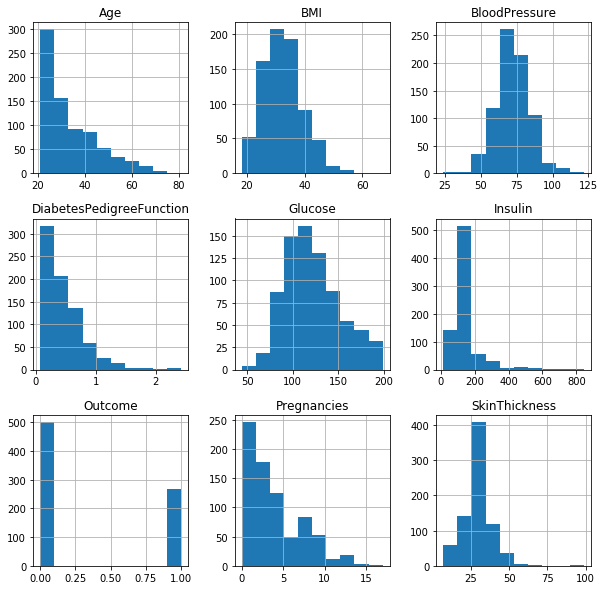

In [14]:
p = a_copy.hist(figsize = (10,10))

## Skewness

A ***left-skewed distribution*** has a long left tail. Left-skewed distributions are also called negatively-skewed distributions. That’s because there is a long tail in the negative direction on the number line. The mean is also to the left of the peak.

A ***right-skewed distribution*** has a long right tail. Right-skewed distributions are also called positive-skew distributions. That’s because there is a long tail in the positive direction on the number line. The mean is also to the right of the peak.


In [15]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [16]:
a.shape

(768, 9)

In [17]:
a.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [18]:
!pip install missingno

You should consider upgrading via the 'c:\users\user\anaconda3.1\python.exe -m pip install --upgrade pip' command.


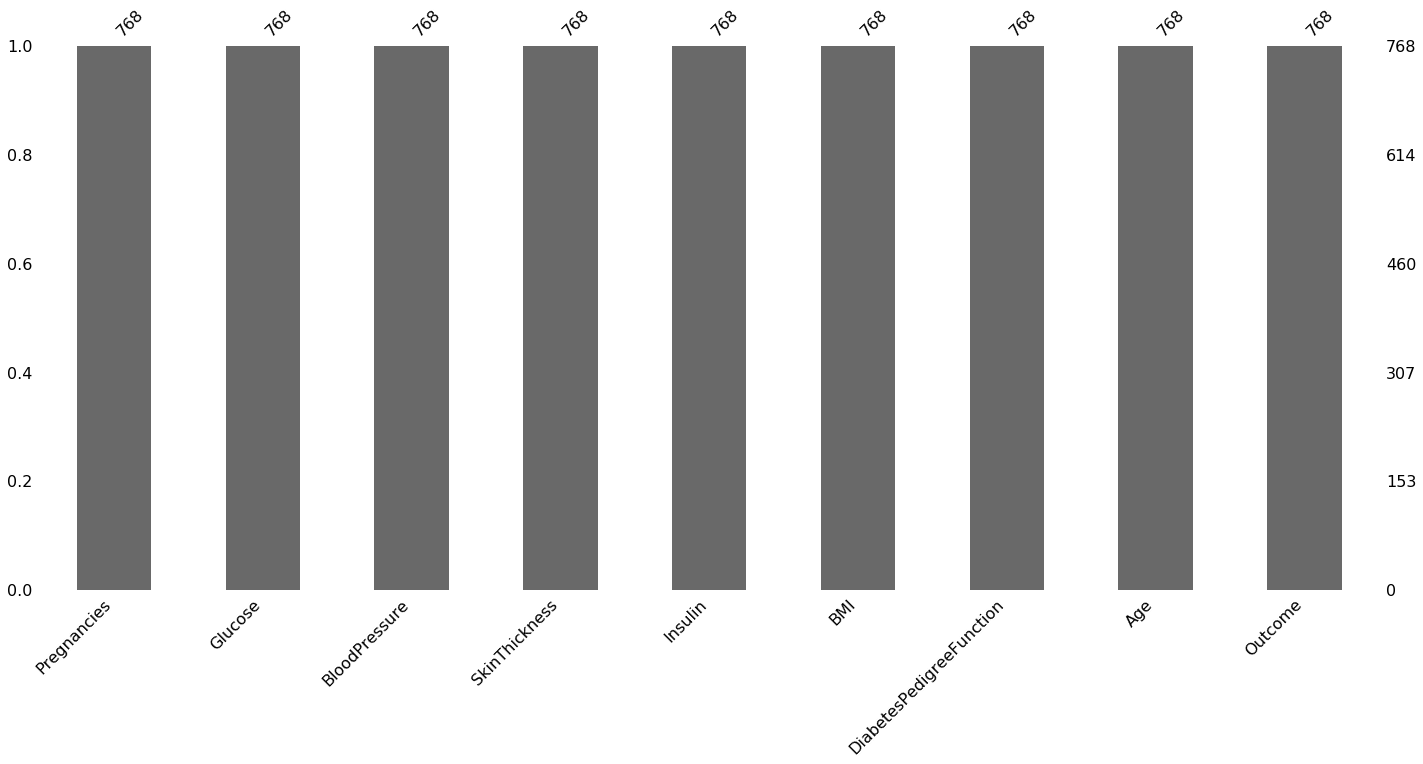

In [19]:
## null count analysis
import missingno as msno
p=msno.bar(a)

0    500
1    268
Name: Outcome, dtype: int64


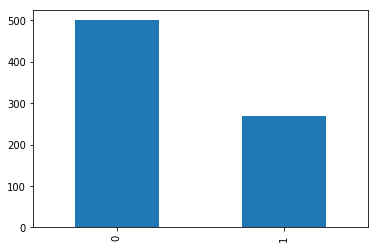

In [20]:
## checking the balance of the data by plotting the count of outcomes by their value
color_wheel = {1: "#0392cf", 
               2: "#7bc043"}
colors = a["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(a.Outcome.value_counts())
p=a.Outcome.value_counts().plot(kind="bar")

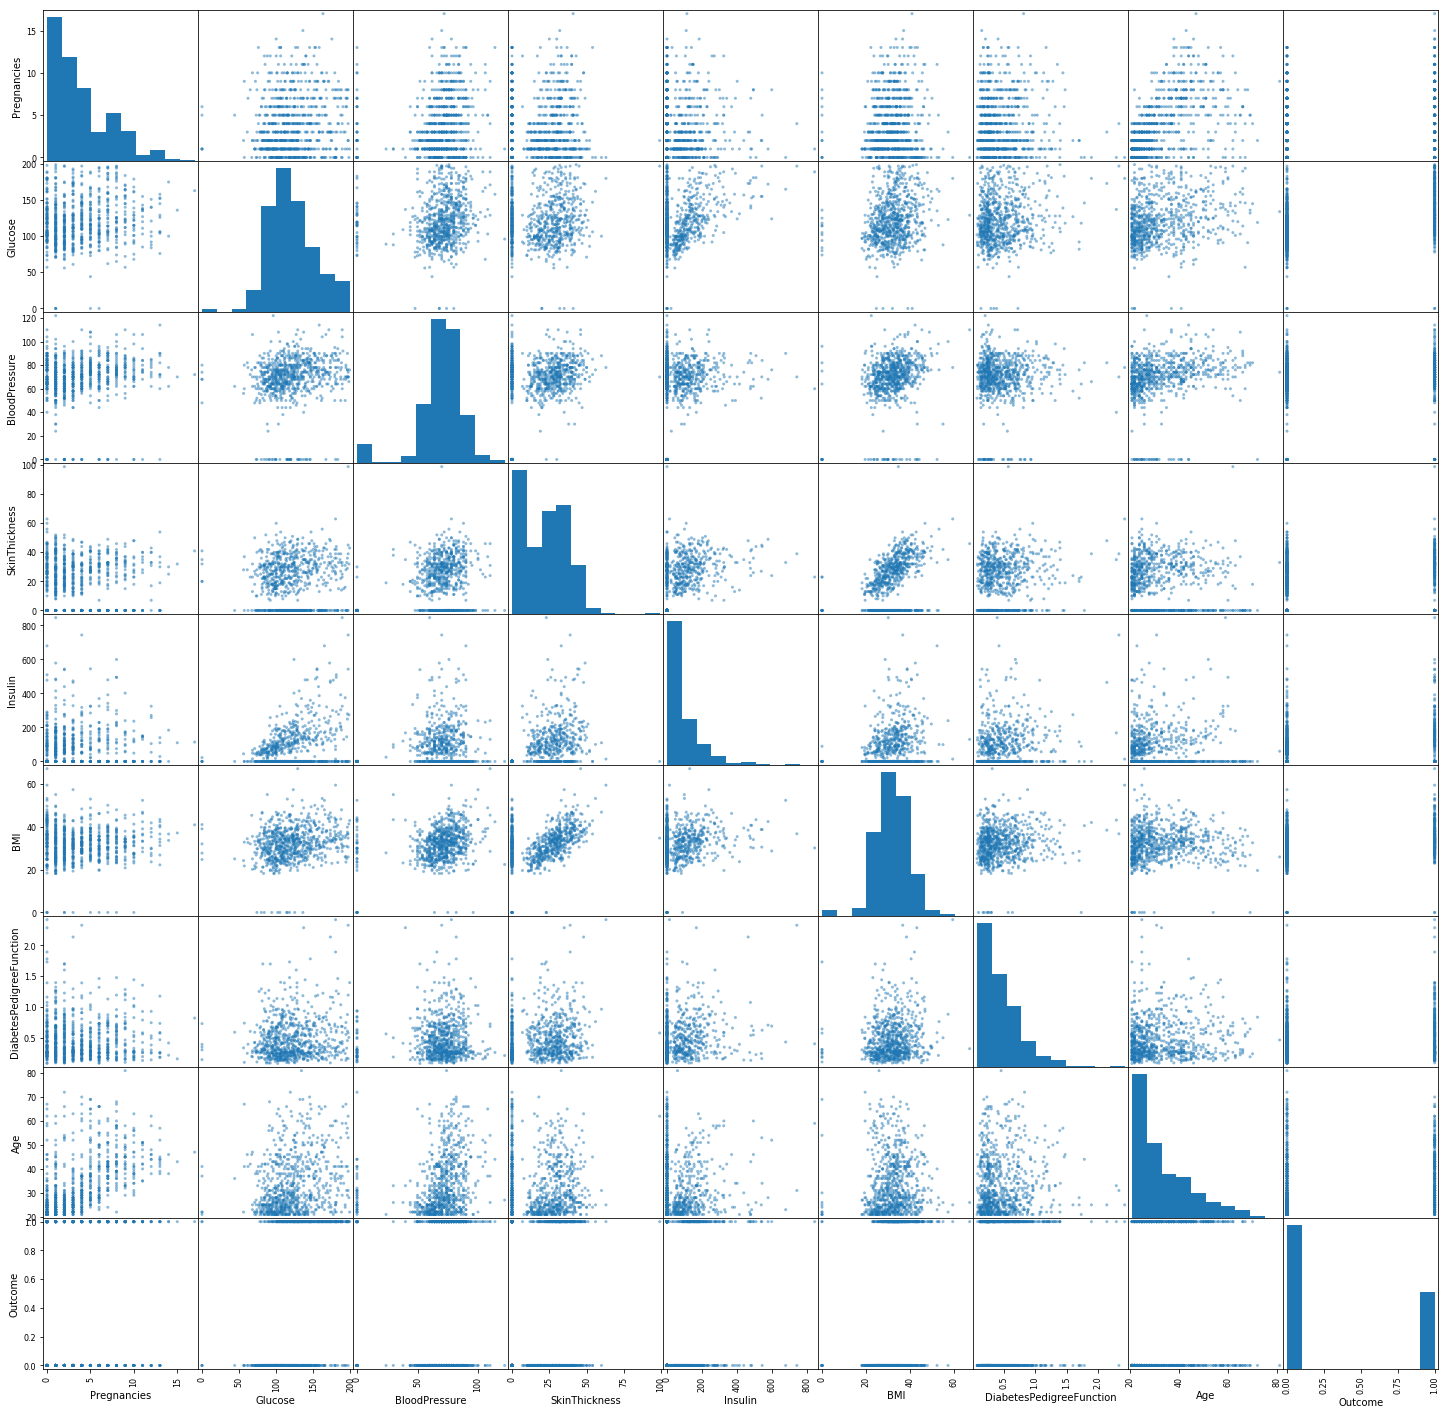

In [21]:
from pandas.plotting import scatter_matrix
p=scatter_matrix(a,figsize=(25, 25))

###### The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.

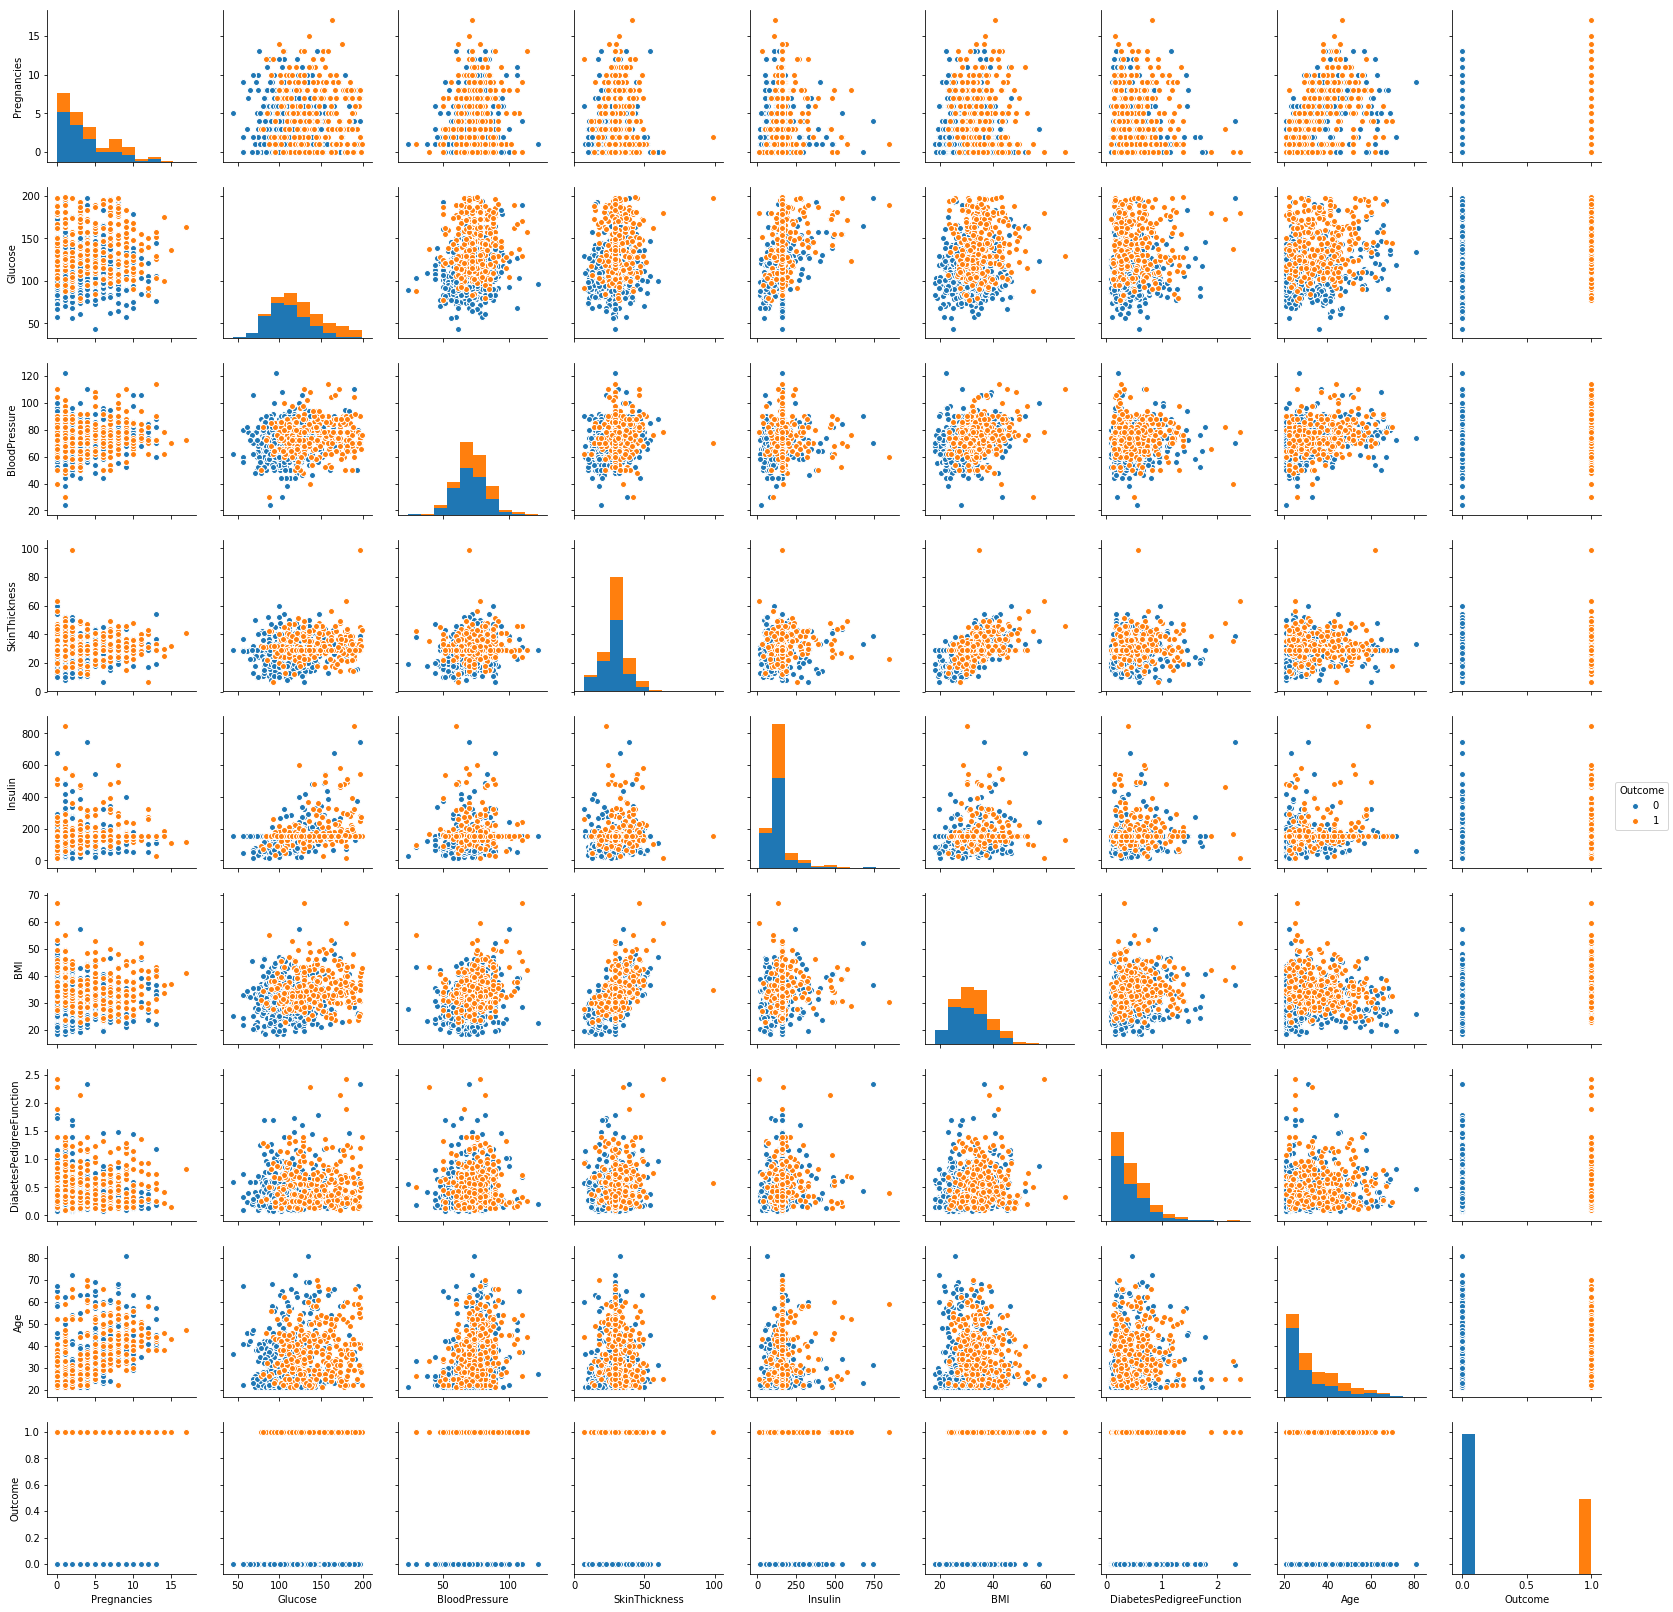

In [22]:
p=sb.pairplot(a_copy, hue = 'Outcome')

***Pearson's Correlation Coefficient***: helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.

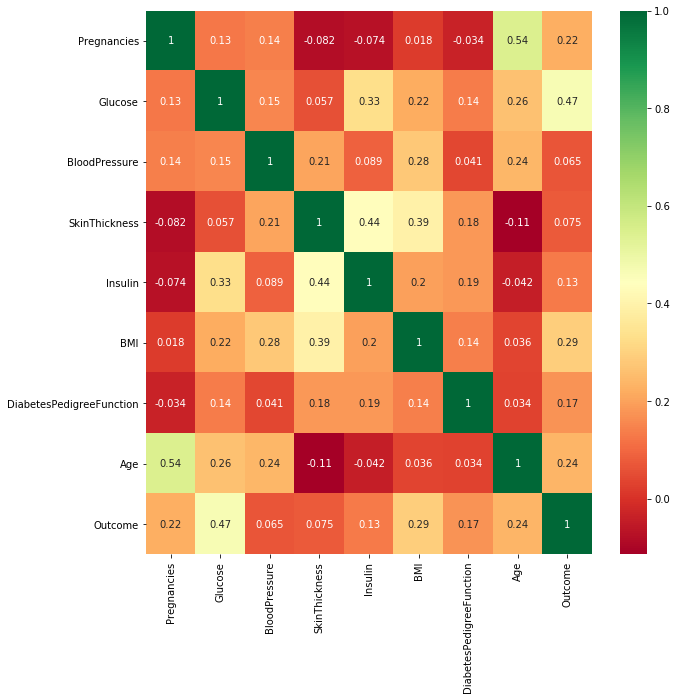

In [23]:
b = plt.subplots(figsize=(10,10))
sb.heatmap(a.corr(),annot=True,cmap="RdYlGn")

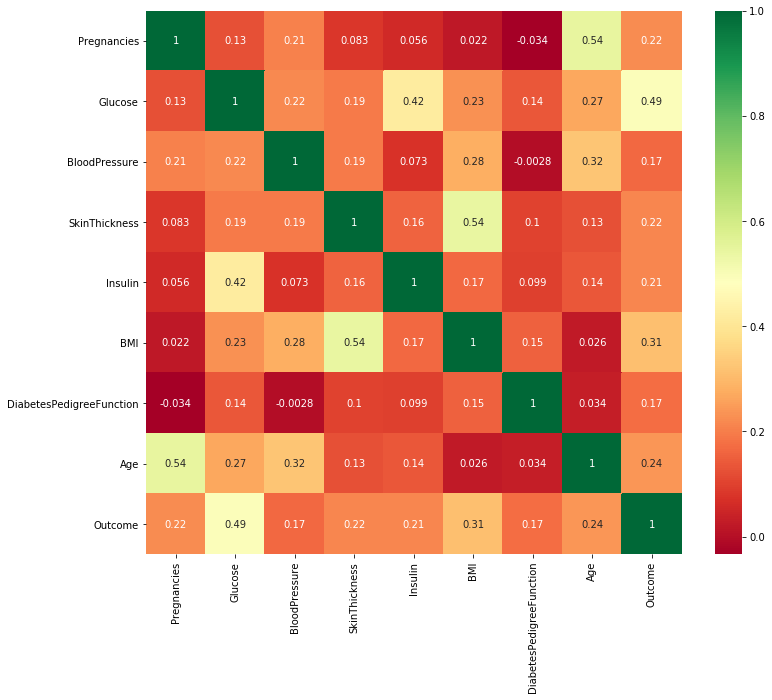

In [24]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sb.heatmap(a_copy.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

In [25]:
# dataframe before transformation
a_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [26]:
# scaling the data
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x =  pd.DataFrame(sc_X.fit_transform(a_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'])

In [27]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.166292,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.852531,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-1.332833,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.634212,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.548980,5.484909,-0.020496


In [28]:
#X = diabetes_data.drop("Outcome",axis = 1)
y = a_copy.Outcome  # assigning the label column

## Test Train Split and Cross Validation methods



***Train Test Split*** : To have unknown datapoints to test the data rather than testing with the same points with which the model was trained. This helps capture the model performance much better.



***Cross Validation***: When model is split into training and testing it can be possible that specific type of data point may go entirely into either training or testing portion. This would lead the model to perform poorly. Hence over-fitting and underfitting problems can be well avoided with cross validation techniques



***About Stratify*** : Stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.


In [29]:
#importing train_test_split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=1/3,random_state=42, stratify=y)

# Logistic regression

In [30]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model=lr.fit(xtrain,ytrain)
pred=model.predict(xtest)

In [31]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest,pred)*100

26.5625

In [32]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(ytest,pred)
accuracy_score(ytest,pred)*100

73.4375

## decision tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier(criterion='entropy',random_state=20,max_depth=3)
model=dc.fit(xtrain,ytrain)
pred=model.predict(xtest)

from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest,pred)*100

from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(ytest,pred)
accuracy_score(ytest,pred)*100

72.65625

In [34]:
dc

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=20,
            splitter='best')

# using RandomForestClassifier

In [35]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=30)
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(random_state=10,max_leaf_nodes=4,criterion='gini', min_samples_leaf=1)
model=rfc.fit(xtrain,ytrain)
pred=model.predict(xtest)
from sklearn.metrics import accuracy_score
print("accuracy is %f"%(accuracy_score(ytest,pred)*100))

accuracy is 77.922078


C:\Users\user\Anaconda3.1\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [36]:
model.criterion

'gini'

In [37]:
model.feature_importances_

array([0.0140799 , 0.41792805, 0.00463976, 0.06935118, 0.06038967,
       0.12611214, 0.        , 0.3074993 ])

# using Random forests regressor

In [38]:
from sklearn.ensemble import RandomForestRegressor
rf1=RandomForestRegressor(random_state=20,n_estimators=40,max_depth=5)
model1=rf1.fit(xtrain,ytrain)
pred=model.predict(xtest)
 
from sklearn.metrics import mean_absolute_error,mean_squared_error
print("MSE is %0.2f"%(mean_squared_error(ytest,pred)))
print("MAE is %0.2f"%(mean_absolute_error(ytest,pred)))

MSE is 0.22
MAE is 0.22


In [39]:
model1.criterion

'mse'

In [40]:
rf1

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=1,
           oob_score=False, random_state=20, verbose=0, warm_start=False)

## KNN

In [41]:
#importing train_test_split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=1/3,random_state=42, stratify=y)

In [42]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(xtrain,ytrain)
    
    train_scores.append(knn.score(xtrain,ytrain))
    test_scores.append(knn.score(xtest,ytest))

In [43]:
print(train_scores)
print(test_scores)

[1.0, 0.84765625, 0.865234375, 0.83203125, 0.8359375, 0.806640625, 0.81640625, 0.8046875, 0.802734375, 0.79296875, 0.80859375, 0.794921875, 0.796875, 0.79296875]
[0.7265625, 0.73046875, 0.75390625, 0.74609375, 0.734375, 0.7265625, 0.74609375, 0.73046875, 0.73046875, 0.72265625, 0.76171875, 0.7265625, 0.75390625, 0.73828125]


In [44]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [45]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 76.171875 % and k = [11]


In [70]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(11)

knn.fit(xtrain,ytrain)
knn.score(xtest,ytest)

0.76171875

In [47]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above. Creating the confusion Matrix
pred = knn.predict(xtest)
pred

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

In [48]:
confusion_matrix(ytest,pred)
pd.crosstab(ytest, pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,143,24,167
1,37,52,89
All,180,76,256


Text(0.5,15,'Predicted label')

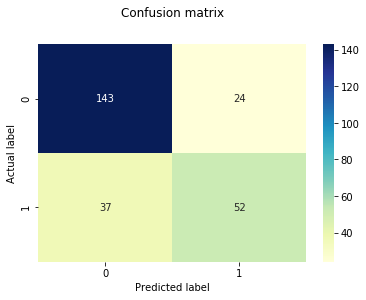

In [49]:
# Creating a Heatmap for the confusion matrix. 
pred = knn.predict(xtest)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(ytest, pred)
p = sb.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [50]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(ytest,pred))

             precision    recall  f1-score   support

          0       0.79      0.86      0.82       167
          1       0.68      0.58      0.63        89

avg / total       0.76      0.76      0.76       256



In [51]:
from sklearn.metrics import roc_curve
pred_proba = knn.predict_proba(xtest)[:,1]
pred_proba


array([0.        , 0.63636364, 0.36363636, 0.09090909, 0.45454545,
       0.27272727, 0.63636364, 0.90909091, 0.        , 0.18181818,
       0.63636364, 0.45454545, 0.27272727, 0.90909091, 0.63636364,
       0.72727273, 0.54545455, 0.        , 0.18181818, 0.72727273,
       0.18181818, 0.18181818, 0.18181818, 0.36363636, 0.09090909,
       0.36363636, 0.54545455, 0.27272727, 0.09090909, 0.09090909,
       0.45454545, 0.09090909, 0.45454545, 0.        , 0.        ,
       0.36363636, 0.18181818, 0.09090909, 0.        , 0.        ,
       0.63636364, 0.18181818, 0.27272727, 0.        , 0.90909091,
       0.18181818, 0.27272727, 0.63636364, 0.81818182, 0.        ,
       0.45454545, 0.        , 0.09090909, 0.        , 0.63636364,
       0.54545455, 0.        , 0.72727273, 0.36363636, 0.63636364,
       0.09090909, 0.90909091, 0.09090909, 0.09090909, 0.        ,
       0.        , 0.54545455, 0.36363636, 0.45454545, 0.72727273,
       0.18181818, 0.18181818, 0.54545455, 0.90909091, 0.18181

In [52]:
fpr, tpr, thresholds = roc_curve(ytest, pred_proba)
print('FPR')
print(fpr)
print('TPR')
print(tpr)
print('Thresholds')
print(thresholds)

FPR
[0.         0.01197605 0.0239521  0.07185629 0.11976048 0.14371257
 0.20359281 0.26946108 0.38922156 0.5748503  0.71257485 1.        ]
TPR
[0.         0.06741573 0.16853933 0.23595506 0.42696629 0.58426966
 0.70786517 0.7752809  0.86516854 0.94382022 0.96629213 1.        ]
Thresholds
[1.90909091 0.90909091 0.81818182 0.72727273 0.63636364 0.54545455
 0.45454545 0.36363636 0.27272727 0.18181818 0.09090909 0.        ]


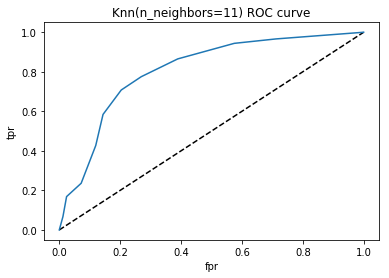

In [53]:
# Plotting the ROC Curve
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [54]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(ytest,pred_proba)

0.8072730942609163

In [56]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(x,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7747395833333334
Best Parameters: {'n_neighbors': 25}


In [59]:
from sklearn.neighbors import  KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=25,algorithm='auto')
model=knn.fit(xtrain,ytrain)
pred=model.predict(xtest)

In [60]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(ytest,pred)*100)
print(confusion_matrix(ytest,pred))

74.21875
[[143  24]
 [ 42  47]]
